# Dendrite Segmentation Inference

### Set Proxy Environment Variables

In [1]:
import os

# Set proxy environment variables
os.environ['http_proxy'] = 'http://proxy:80'
os.environ['https_proxy'] = 'http://proxy:80'

### Import Required Libraries

In [2]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models.segmentation import fcn_resnet50
from torchvision.transforms import functional as F
from matplotlib.colors import ListedColormap

### Load Model and Define Plot Results Function

In [3]:
# Load and prepare the model
num_classes = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_dendrites = fcn_resnet50(weights=None, num_classes=num_classes)
model_dendrites.load_state_dict(torch.load('dendrite_model.pt'), strict=False)
model_dendrites.eval().to(device)

# Define the plot function
def plot_results(R, G, B, input_image, actual_mask, prediction):
    custom_cmap = ListedColormap(['black', (R/255, G/255, B/255)])
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(input_image)
    axs[0].set_title('Val Input Image')
    axs[0].axis('off')
    axs[1].imshow(actual_mask, cmap='gray')
    axs[1].set_title('Dendrite Mask')
    axs[1].axis('off')
    axs[2].imshow(prediction, cmap=custom_cmap)
    axs[2].set_title('Predicted Mask')
    axs[2].axis('off')
    plt.tight_layout()
    plt.show()

### Process Image and Plot Results

In [4]:
# Load and process images
def process_and_plot_prediction(idx, dset):
    image_path = f'Dataset/DeepD3_{dset}/input_images/image_{idx}.png'
    mask_path = f'Dataset/DeepD3_{dset}/dendrite_images/dendrite_{idx}.png'
    input_image = Image.open(image_path)
    mask_image = Image.open(mask_path)
    image = F.to_tensor(input_image.convert("RGB")).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model_dendrites(image)['out']
    semantic_mask_bin = (torch.sigmoid(output).squeeze().cpu().numpy() > 0.1).astype(np.uint8)
    plot_results(242, 90, 212, input_image, mask_image, semantic_mask_bin)

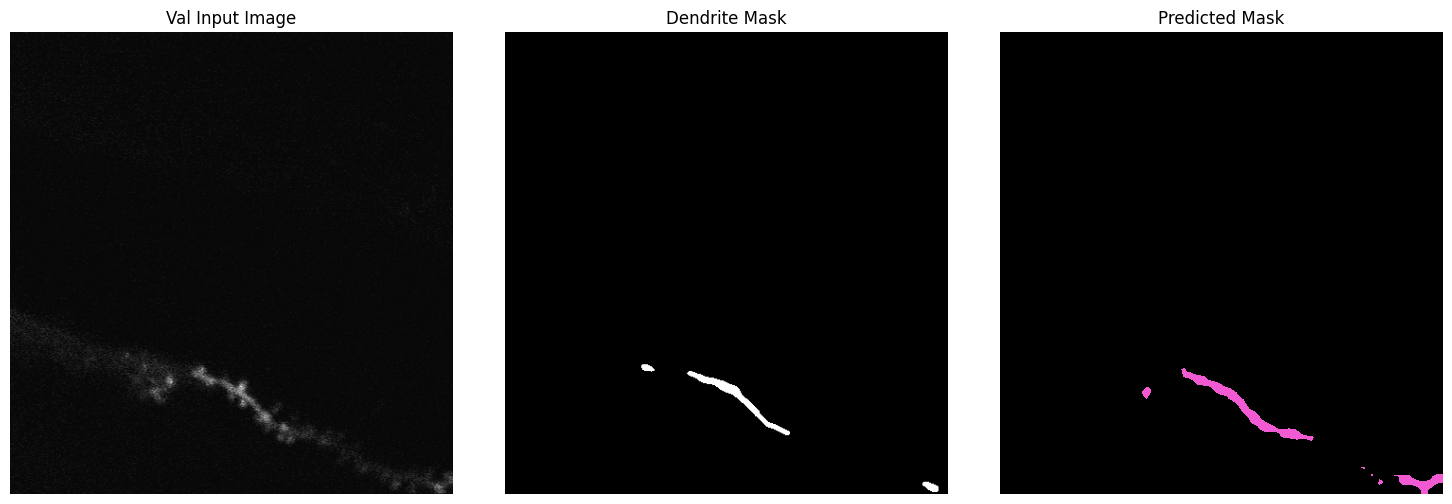

In [5]:
idx = 50
dset = 'Validation'
process_and_plot_prediction(idx, dset)

### End of Script